In [1]:
# Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Reading the CSV File and Storing in the form of a Data Frame

In [5]:
data=pd.read_csv('yield_prediction.csv')

In [6]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      242834 non-null  float64
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           238143 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(3), object(4)
memory usage: 13.1+ MB


# Handling Missing values

In [8]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year        3257
Season              0
Crop                0
Area             7948
Production       3730
dtype: int64

<AxesSubplot:>

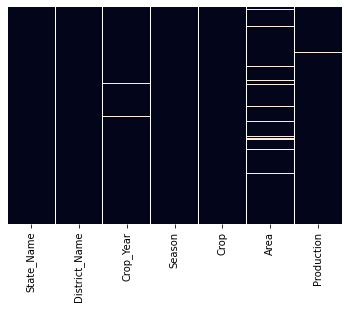

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [10]:
data['Area'].fillna(data['Area'].mean(), inplace=True)
data['Crop_Year'].fillna(data["Crop_Year"].mode()[0], inplace=True)
data['Production'].fillna(data['Production'].mean(), inplace=True)

<AxesSubplot:>

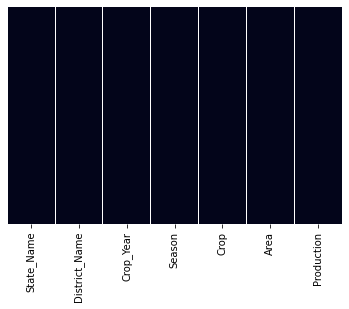

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  float64
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(3), object(4)
memory usage: 13.1+ MB


# Checking Skewness

In [13]:
print(data['Production'].skew())

41.05385038354119


In [14]:
print(data['Area'].skew())

49.12767316618914


In [15]:
data['Production']= np.log1p(data['Production'])

In [16]:
data['Area']= np.log1p(data['Area'])

In [17]:
print(data['Production'].skew())

0.19210510407634226


In [18]:
print(data['Area'].skew())

-0.03956418866536974


# Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['Area'] = scaler.fit_transform(data[['Area']])
data['Production'] = scaler.fit_transform(data[['Production']])


# PCA

In [20]:
from sklearn.decomposition import PCA
x = pd.DataFrame()
x["Area"]=data['Area']
x["Production"]=data["Production"]
pca = PCA(n_components=0.99)
pc = pd.DataFrame(pca.fit_transform(x))

In [21]:
x.head(10)

,Area,Production
0,0.234695,0.251489
1,-1.917539,-1.848179
2,-0.656737,-0.303757
3,-0.463693,-0.094030
4,0.037077,-0.505134
5,1.187604,3.409395
6,-1.021777,-0.656150
7,-2.062107,-1.724943
8,-1.670397,-1.216161
9,-0.985175,-0.497897


In [22]:
pca = PCA(n_components=0.99)
pc = pd.DataFrame(pca.fit_transform(x))

In [23]:
pc.head(10)

,0,1
0,0.343784,0.011875
1,-2.662764,0.049045
2,-0.679172,0.249595
3,-0.394370,0.261392
4,-0.330966,-0.383401
5,3.250569,1.571044
6,-1.186473,0.258537
7,-2.677849,0.238411
8,-2.041105,0.321193
9,-1.048690,0.344558


In [24]:
#data.drop(['Area','Production','Crop_Year'],axis=1)

In [25]:
data['Area']=pc[0]
#data['Production']=pc['1']

In [26]:

pd.set_option("display.max_rows", None, "display.max_columns", None)
#df

In [27]:
data.Crop.value_counts()

Rice                         15104
Maize                        13947
Moong(Green Gram)            10318
Urad                          9850
Sesamum                       9046
Groundnut                     8834
Sugarcane                     7921
Wheat                         7899
Rapeseed &Mustard             7592
Arhar/Tur                     7578
Gram                          7361
Jowar                         7065
Onion                         7012
Potato                        6931
Dry chillies                  6489
Sunflower                     5571
Bajra                         5427
Small millets                 4652
Peas & beans (Pulses)         4524
Cotton(lint)                  4518
Linseed                       4405
Masoor                        4224
Turmeric                      4202
Barley                        4199
Sweet potato                  4198
Ragi                          4145
Horse-gram                    3902
Other Kharif pulses           3659
Castor seed         

In [28]:
df=data

# Handling Categorical Values

In [29]:
#Finding ctegorical values from df
categorical=[]
for i in df:
    if df.dtypes[i] == object:
        
        categorical.append(i)
print(categorical)

['State_Name', 'District_Name', 'Season', 'Crop']


In [30]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Crop'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(le_name_mapping)

{'Apple': 0, 'Arcanut (Processed)': 1, 'Arecanut': 2, 'Arhar/Tur': 3, 'Ash Gourd': 4, 'Atcanut (Raw)': 5, 'Bajra': 6, 'Banana': 7, 'Barley': 8, 'Bean': 9, 'Beans & Mutter(Vegetable)': 10, 'Beet Root': 11, 'Ber': 12, 'Bhindi': 13, 'Bitter Gourd': 14, 'Black pepper': 15, 'Blackgram': 16, 'Bottle Gourd': 17, 'Brinjal': 18, 'Cabbage': 19, 'Cardamom': 20, 'Carrot': 21, 'Cashewnut': 22, 'Cashewnut Processed': 23, 'Cashewnut Raw': 24, 'Castor seed': 25, 'Cauliflower': 26, 'Citrus Fruit': 27, 'Coconut ': 28, 'Coffee': 29, 'Colocosia': 30, 'Cond-spcs other': 31, 'Coriander': 32, 'Cotton(lint)': 33, 'Cowpea(Lobia)': 34, 'Cucumber': 35, 'Drum Stick': 36, 'Dry chillies': 37, 'Dry ginger': 38, 'Garlic': 39, 'Ginger': 40, 'Gram': 41, 'Grapes': 42, 'Groundnut': 43, 'Guar seed': 44, 'Horse-gram': 45, 'Jack Fruit': 46, 'Jobster': 47, 'Jowar': 48, 'Jute': 49, 'Jute & mesta': 50, 'Kapas': 51, 'Khesari': 52, 'Korra': 53, 'Lab-Lab': 54, 'Lemon': 55, 'Lentil': 56, 'Linseed': 57, 'Litchi': 58, 'Maize': 59, '

In [31]:
label_encoder = preprocessing.LabelEncoder()

for i in categorical:
    df[i]= label_encoder.fit_transform(df[i])

In [32]:
df.head(1000)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000.0,1,2,0.343784,0.251489
1,0,427,2000.0,1,74,-2.662764,-1.848179
2,0,427,2000.0,1,95,-0.679172,-0.303757
3,0,427,2000.0,4,7,-0.394370,-0.094030
4,0,427,2000.0,4,22,-0.330966,-0.505134
5,0,427,2000.0,4,28,3.250569,3.409395
6,0,427,2000.0,4,38,-1.186473,-0.656150
7,0,427,2000.0,4,106,-2.677849,-1.724943
8,0,427,2000.0,4,108,-2.041105,-1.216161
9,0,427,2000.0,4,109,-1.048690,-0.497897


In [33]:
df=df.sample(frac=1)

In [34]:
df.head(100)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
100893,15,437,2005.0,4,106,0.643747,1.119967
4333,1,335,2004.0,2,102,-0.270349,-0.460909
199572,30,13,2003.0,2,67,0.031374,0.448810
46426,6,66,2000.0,1,3,0.008998,-0.132324
118372,16,494,2000.0,1,103,1.157894,0.493454
216189,30,284,1997.0,1,64,-2.764990,-1.848179
150412,22,142,2014.0,5,87,0.086812,0.376441
198476,30,4,2005.0,1,33,-0.614685,-0.708569
93982,14,473,1998.0,1,6,1.998687,1.180539
139881,19,173,2014.0,4,59,-0.180743,-0.036023


In [35]:
y=df['Production']

In [36]:
df=df.drop('Production',axis=1)

In [37]:
x=df

In [38]:
x.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area
100893,15,437,2005.0,4,106,0.643747
4333,1,335,2004.0,2,102,-0.270349
199572,30,13,2003.0,2,67,0.031374
46426,6,66,2000.0,1,3,0.008998
118372,16,494,2000.0,1,103,1.157894


# Spliting data into training and testing

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

# Evaluation Metrics

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
rms=[]
mse=[]
mae=[]
r2=[]
def evaluation(model, x_test, y_test, rms , mse, mae, r2):
        pred = model.predict(x_test)
        
        rms.append(np.sqrt(mean_squared_error(y_test, pred)))
        mse.append(mean_squared_error(y_test, pred))
        mae.append(mean_absolute_error(y_test, pred))
        r2.append(r2_score(y_test,pred)*100)
        
        print("Result\n","---------------------------------------------")
        print("\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, pred)))
        print("\nMean Squared Error: \t",mean_squared_error(y_test, pred))
        print("\nMean Absolute Error: \t",mean_absolute_error(y_test, pred))
        print("\nR2 Score: \t\t",r2_score(y_test,pred))

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
lr=regressor.fit(x_train, y_train)

#y_pred_test_Forestreg=model.predict(x_test)
lr.score(x_test,y_test)

0.8929864676825939

In [43]:
evaluation(lr, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.32789998259451164

Mean Squared Error: 	 0.10751839858548105

Mean Absolute Error: 	 0.19885791642258094

R2 Score: 		 0.8929864676825939


# RandomForest

In [44]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
r=regressor.fit(x_train, y_train) 

In [45]:
r.score(x_test,y_test)

0.9732011694601688

In [46]:
evaluation(r, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.1640891876936303

Mean Squared Error: 	 0.026925261517955427

Mean Absolute Error: 	 0.08254610702349571

R2 Score: 		 0.9732011694601688


# DecisionTreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

model.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
model.score(x_test,y_test)

0.9492054246817138

In [49]:
evaluation(model, x_test, y_test,  rms , mse, mae, r2)

Result
 ---------------------------------------------

Root Mean Squared Error:  0.22590753182108161

Mean Squared Error: 	 0.05103421293349301

Mean Absolute Error: 	 0.10447186644400323

R2 Score: 		 0.9492054246817138


# Scores of Models

In [50]:
df=pd.DataFrame()
df['Model']=["LR","DCT","RF"]
df['RMSE']=rms
df['MSE']=mse
df['MAE']=mae
df['R2']=r2

df

,Model,RMSE,MSE,MAE,R2
0,LR,0.327900,0.107518,0.198858,89.298647
1,DCT,0.164089,0.026925,0.082546,97.320117
2,RF,0.225908,0.051034,0.104472,94.920542


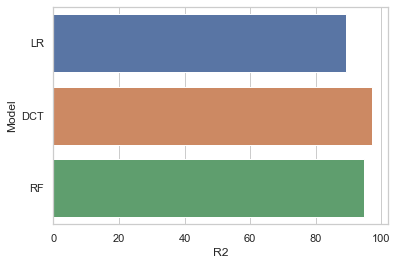

In [51]:

sns.set(style="whitegrid")
ax=sns.barplot(y='Model',x='R2',data=df)